In [3]:
# widen jupyter notebook window
from IPython.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))

# check environment
import os
print(f'Conda Environment: ' + os.environ['CONDA_DEFAULT_ENV'])

Conda Environment: roicat


In [4]:
from pathlib import Path

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate

In [6]:
%load_ext autoreload
%autoreload 2
import bnpm

In [42]:
path_ws          = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230510/exp_0001.h5'
path_csv         = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/cam4_CSVs/20230510/times_cam42023-05-10T13_12_02.csv'
path_tca_all     = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/run_20230701/factors_refit_bigTCA.h5'
path_idxLaserCam = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/eye_laser_trace_extraction/20230510/jobNum_0/idx_eye_laser.pkl'
path_vqt         = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/run_20230701/20230510/jobNum_0/analysis_files/VQT_Analyzer.h5'

In [44]:
directory_save   = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/'

In [4]:
ts = {}

In [40]:
ws_raw = bnpm.h5_handling.simple_load(
    filepath=path_ws,
    return_dict=True,
    verbose=True,
)

==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230510/exp_0001.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

In [6]:
names_ws = [
    'sync_pulse',
    'laser_pickoff',
    'treadmill',
    'lickometer',
    'rewards',
    'cursor',
    'y_galvo',
]

ws = {name: trace for name, trace in zip(names_ws, ws_raw['sweep_0001']['analogScans'])}

In [7]:
trace = ws['laser_pickoff']

def get_laser_pickoff_start_and_end_indices(trace, idx_fastForward=60*59*120, starting_frames=1000):
    get_diff_smooth = lambda x: np.diff(bnpm.timeSeries.simple_smooth(x, sig=4), n=1)

    trace_start = trace[:starting_frames]
    idx_fastForward = int(idx_fastForward)
    trace_end = trace[idx_fastForward:]
    idx_start = np.argmax(get_diff_smooth(trace_start))
    idx_end = np.argmin(get_diff_smooth(trace_end)) + idx_fastForward
    return idx_start, idx_end

val_idxWsStartLaser, val_idxWsEndLaser = get_laser_pickoff_start_and_end_indices(
    trace=ws['laser_pickoff'],
    idx_fastForward=60*59*120, 
    starting_frames=1000,
)

ts['val_idxWsStartLaser'] = val_idxWsStartLaser
ts['val_idxWsEndLaser'] = val_idxWsEndLaser

(90.0, 113.4)

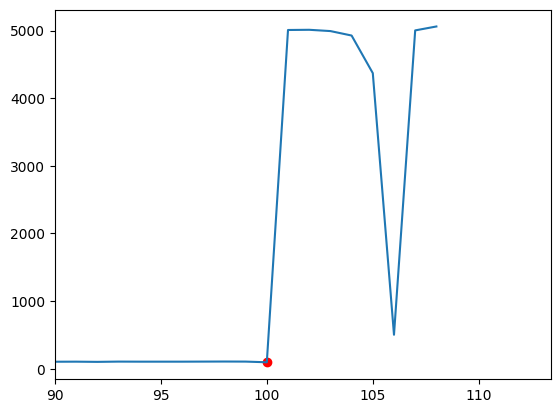

In [8]:
plt.figure()
plt.plot(ws['laser_pickoff'][:109])
plt.scatter(ts['val_idxWsStartLaser'], ws['laser_pickoff'][ts['val_idxWsStartLaser']], c='r')
plt.xlim(90, None)

(3602400.0, 3602600.0)

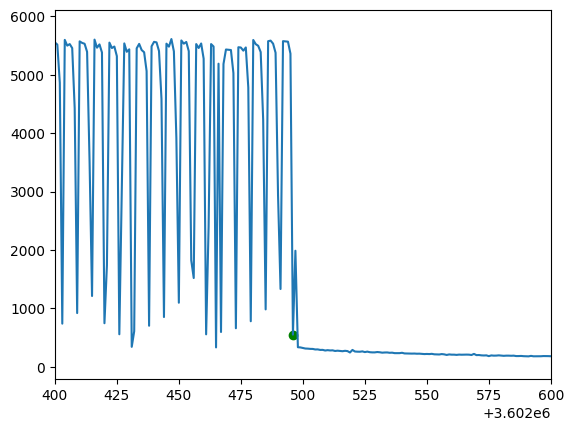

In [9]:
plt.figure()
plt.plot(ws['laser_pickoff'])
plt.scatter(ts['val_idxWsEndLaser'], ws['laser_pickoff'][ts['val_idxWsEndLaser']], c='g')
# plt.xlim(90, None)
plt.xlim(3.6024e6,3.6026e6)

In [41]:
csv = pd.read_csv(
    filepath_or_buffer=path_csv,
    delimiter=',',
    header=None,
)

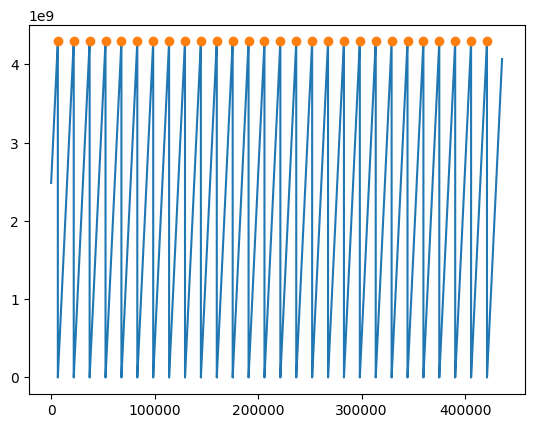

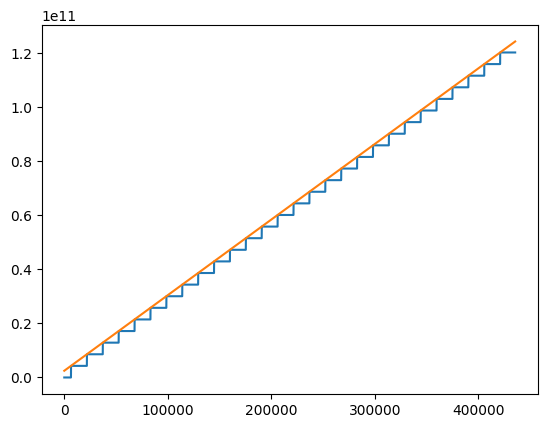

In [12]:
val_abstimeModulated__idx_cam = csv[2]

ts['val_abstimeModulated__idx_cam'] = val_abstimeModulated__idx_cam

val_abstime__idx_cam = bnpm.indexing.moduloCounter_to_linearCounter(
    trace=ts['val_abstimeModulated__idx_cam'],
    modulus=2**32,
    plot_pref=True
)

ts['val_abstimeModulated__idx_cam'] = val_abstimeModulated__idx_cam
ts['val_abstime__idx_cam'] = val_abstime__idx_cam

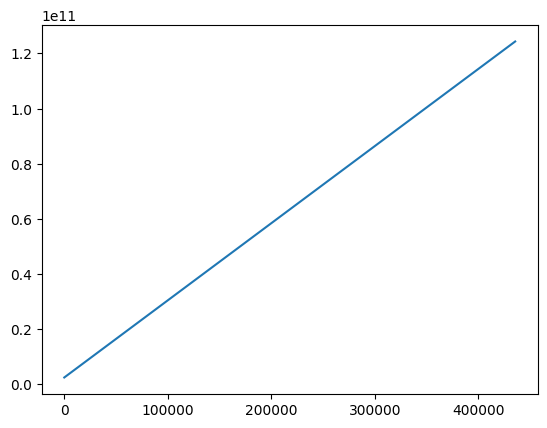

In [13]:
plt.figure()
plt.plot(val_abstime__idx_cam)

In [15]:
tca_all = bnpm.h5_handling.simple_load(
    filepath=path_tca_all,
    return_dict=True,
    verbose=True,
)

==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/run_20230701/factors_refit_bigTCA.h5" ====
1. 20230430:----------------
  1. time:          shape=(21750, 10) , dtype=float32
  2. frequency:     shape=(36, 10) ,    dtype=float32
  3. (points (xy)):    shape=(1872, 10) ,  dtype=float32
2. 20230501:----------------
  1. time:          shape=(21717, 10) , dtype=float32
  2. frequency:     shape=(36, 10) ,    dtype=float32
  3. (points (xy)):    shape=(1872, 10) ,  dtype=float32
3. 20230502:----------------
  1. time:          shape=(21705, 10) , dtype=float32
  2. frequency:     shape=(36, 10) ,    dtype=float32
  3. (points (xy)):    shape=(1872, 10) ,  dtype=float32
4. 20230503:----------------
  1. time:          shape=(21761, 10) , dtype=float32
  2. frequency:     shape=(36, 10) ,    dtype=float32
  3. (points (xy)):    shape=(1872, 10) ,  dtype=float32
5. 20230504:----------------
  1. time:          shape=(21729, 10) , dtype=float32
  2. frequency:    

In [16]:
tca = tca_all['20230510']

In [17]:
tca['time'].shape

(21762, 10)

In [18]:
val_tca__idx_tca = tca['time']

ts['val_tca__idx_tca'] = val_tca__idx_tca

In [19]:
val_yGalvo__idx_ws = ws['y_galvo']

ts['val_yGalvo__idx_ws'] = val_yGalvo__idx_ws

do the interpolation

In [21]:
peaks = scipy.signal.find_peaks(
    x=-np.diff(ws['y_galvo'], n=1),
    height=200,
)[0] + 1

val_idxWs__idx_SI = peaks

ts['val_idxWs__idx_SI'] = val_idxWs__idx_SI

(0.0, 1000.0)

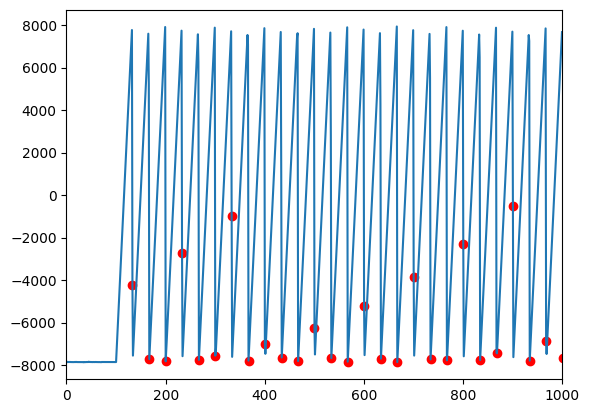

In [22]:
plt.figure()
plt.plot(ws['y_galvo'][:1000])
plt.scatter(peaks, ws['y_galvo'][peaks], c='r')
plt.xlim(0,1000)

In [23]:
val_idxTca__idx_tca = np.arange(val_tca__idx_tca.shape[0])

ts['val_idxTca__idx_tca'] = val_idxTca__idx_tca

In [25]:
idx_eye_laser = bnpm.file_helpers.pickle_load(path_idxLaserCam)

In [26]:
val_idxCamStartLaser = idx_eye_laser['idx_start']
val_idxCamEndLaser   = idx_eye_laser['idx_end']

ts['val_idxCamStartLaser'] = val_idxCamStartLaser
ts['val_idxCamEndLaser']   = val_idxCamEndLaser

In [27]:
vqt = bnpm.h5_handling.simple_load(
    filepath=path_vqt,
    return_dict=False,
    verbose=True,
)

1. VQT:----------------
  1. filters:       shape=(36, 501) ,   dtype=complex64
  2. wins:          shape=(36, 501) ,   dtype=float32
2. frequencies:     shape=(36,) ,       dtype=float64
3. point_positions:    shape=(1872,) ,     dtype=float32
4. spectrograms:----------------
  1. 0:             shape=(2, 936, 36, 21762) ,dtype=float32
5. x_axis:----------------
  1. 0:             shape=(21762,) ,    dtype=float32


In [28]:
val_idxCam__idx_tca = vqt['x_axis']['0'][:]

ts['val_idxCam__idx_tca'] = val_idxCam__idx_tca

In [29]:
n_frames_cam = len(ts['val_abstime__idx_cam'])

val_idxCam__idxCam = np.arange(n_frames_cam)
# val_idxNormLaser__idx_cam = (val_idxCam__idxCam - ts['val_idxCamStartLaser']) / ts['val_idxCamEndLaser']
t = ts['val_abstime__idx_cam']
val_idxNormLaser__idx_cam = (t - t[ts['val_idxCamStartLaser']]) / (t[ts['val_idxCamEndLaser']] - t[ts['val_idxCamStartLaser']])

ts['val_idxNormLaser__idx_cam'] = val_idxNormLaser__idx_cam
ts['val_idxCam__idxCam'] = val_idxCam__idxCam

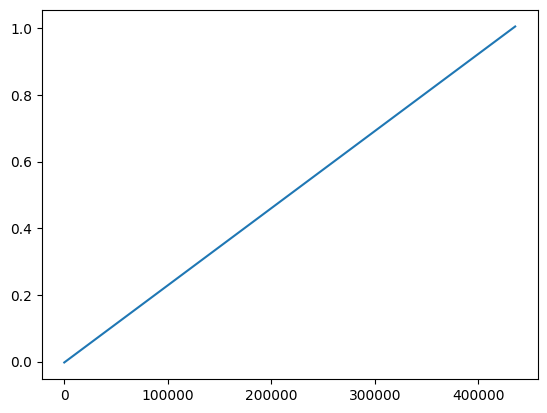

In [30]:
plt.figure()
plt.plot(val_idxNormLaser__idx_cam)

In [31]:
val_idxNormLaser__idx_tca = scipy.interpolate.interp1d(
    x=ts['val_idxCam__idxCam'],
    y=ts['val_idxNormLaser__idx_cam'],
    kind='linear',
    bounds_error=False,
)(ts['val_idxCam__idx_tca'])

ts['val_idxNormLaser__idx_tca'] = val_idxNormLaser__idx_tca

In [32]:
n_frames_ws = len(ts['val_yGalvo__idx_ws'])

val_idxWs__idx_ws = np.arange(n_frames_ws)

val_idxNormLaser__idx_ws = (val_idxWs__idx_ws - ts['val_idxWsStartLaser']) / ts['val_idxWsEndLaser']

ts['val_idxNormLaser__idx_ws'] = val_idxNormLaser__idx_ws
ts['val_idxWs__idx_ws'] = val_idxWs__idx_ws

In [33]:
val_idxNormLaser__idx_SI = scipy.interpolate.interp1d(
    x=ts['val_idxWs__idx_ws'],
    y=ts['val_idxNormLaser__idx_ws'],
    kind='linear',
    bounds_error=False,
)(ts['val_idxWs__idx_SI'])

ts['val_idxNormLaser__idx_SI'] = val_idxNormLaser__idx_SI

In [34]:
ts['val_tca__idx_tca'].shape

(21762, 10)

In [35]:
val_tca__idx_SI = scipy.interpolate.interp1d(
    x=ts['val_idxNormLaser__idx_tca'],
    y=ts['val_tca__idx_tca'],
    axis=0,
    kind='cubic',
    bounds_error=False,
    fill_value=np.nan,
)(ts['val_idxNormLaser__idx_SI'])

ts['val_tca__idx_SI'] = val_tca__idx_SI

In [36]:
val_ws__idx_SI = {key: scipy.interpolate.interp1d(
    x=ts['val_idxNormLaser__idx_ws'],
    y=val_ws__idx_ws,
    axis=0,
    kind='cubic',
    bounds_error=False,
    fill_value=np.nan,
)(ts['val_idxNormLaser__idx_SI']) for key, val_ws__idx_ws in ws.items()}

ts['val_ws__idx_SI'] = val_ws__idx_SI

In [47]:
bnpm.file_helpers.pickle_save(
    obj=ts,
    filepath=str(Path(directory_save) / 'alignment_ts.pkl'),
)

In [48]:
bnpm.file_helpers.pickle_save(
    obj=ts['val_ws__idx_SI'],
    filepath=str(Path(directory_save) / 'ws_idxSI.pkl'),
)

In [49]:
np.save(
    file=str(Path(directory_save) / 'tca_idxSI.npy'),
    arr=ts['val_tca__idx_SI'],
)

In [87]:
paths_ws = bnpm.path_helpers.find_paths(
    dir_outer = r'/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/',
    reMatch='exp.*h5',
    verbose=True,
    depth=5,
    natsorted=True,
)

/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230430/exp_0001.h5
/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230501/exp_0001.h5
/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230502/exp_0001.h5
/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230503/exp_0001.h5
/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230504/exp_0001.h5
/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230505/exp_0001.h5
/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230506/exp_0001.h5
/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230507/exp_0001.h5
/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230508/exp_0001.h5
/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230509/exp_0001.h5
/media/rich/bigSSD/analysis_data/face_rhythm/mouse

In [88]:
dates = [Path(p).parent.name for p in paths_ws]

In [92]:
directory_script = r'/media/rich/Home_Linux_partition/github_repos/NBAP/behavioral_drift_analysis/4a4_align_tca_and_ws_to_SI/align_tca_and_ws_to_SI.py'
directory_data = r'/media/rich/bigSSD/analysis_data/face_rhythm/'

for date in dates[14:]:
    mouse = 'mouse_0322N'
#     date = '20230510'

    path_ws = bnpm.path_helpers.find_paths(
        dir_outer=str(Path(directory_data) / mouse / 'wavesurfer_files' / date ),
        reMatch='exp.*h5',
    )[0]
    path_csv = bnpm.path_helpers.find_paths(
        dir_outer=str(Path(directory_data) / mouse / 'cam4_CSVs' / date ),
        reMatch='cam4.*csv',
    )[0]
    path_tca_all = bnpm.path_helpers.find_paths(
        dir_outer=str(Path(directory_data) / mouse / 'run_20230701' ),
        reMatch='factors_refit_bigTCA\.h5',
    )[0]
    path_idxLaserCam = bnpm.path_helpers.find_paths(
        dir_outer=str(Path(directory_data) / mouse / 'eye_laser_trace_extraction' / date / 'jobNum_0' ),
        reMatch='idx_eye_laser\.pkl',
    )[0]
    path_vqt = bnpm.path_helpers.find_paths(
        dir_outer=str(Path(directory_data) / mouse / 'run_20230701' / date / 'jobNum_0' / 'analysis_files' ),
        reMatch='VQT_Analyzer\.h5',
    )[0]
    directory_save = str(Path(r'/media/rich/bigSSD/analysis_data/face_rhythm/') / mouse / 'test' / date)

    command = f"""python {directory_script} \
    --path_ws {path_ws} \
    --path_csv {path_csv} \
    --path_tca_all {path_tca_all} \
    --path_idxLaserCam {path_idxLaserCam} \
    --path_vqt {path_vqt} \
    --directory_save {directory_save} \
    """

    subprocess.call(command, shell=True)

==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230514/exp_0001.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64
    4. CounterTriggerCount:    shape=(1, 1) ,      dtype=float64
    5. CounterTriggers:    shape=(1,) ,        dtype=object
    6. ExternalTriggerCount:    shape=(1, 1) ,      dtype=float64
    7. ExternalTriggers:    shape=(1,) ,        dtype=object
    8. IsEnabled:    shape=(1, 1) ,      dtype=float64
    9. Schemes:----------------
      1. element1:----------------
        1. DeviceName:    shape=(1,) ,        dtype=|S9
        2. Edge:    shape=(1,) ,        dtype=|S6
        3. Name:    shape=(1,) ,        dtype=|S23
        4. PFIID:    shape=(1, 1) ,      dtype=float64
    10. StimulationTriggerScheme:----------------
      1. DeviceName:    shape=(1,) ,        dtype=|S9
      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64


==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230515/exp_0001.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64
    4. CounterTriggerCount:    shape=(1, 1) ,      dtype=float64
    5. CounterTriggers:    shape=(1,) ,        dtype=object
    6. ExternalTriggerCount:    shape=(1, 1) ,      dtype=float64
    7. ExternalTriggers:    shape=(1,) ,        dtype=object
    8. IsEnabled:    shape=(1, 1) ,      dtype=float64
    9. Schemes:----------------
      1. element1:----------------
        1. DeviceName:    shape=(1,) ,        dtype=|S9
        2. Edge:    shape=(1,) ,        dtype=|S6
        3. Name:    shape=(1,) ,        dtype=|S23
        4. PFIID:    shape=(1, 1) ,      dtype=float64
    10. StimulationTriggerScheme:----------------
      1. DeviceName:    shape=(1,) ,        dtype=|S9
      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64


==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230517/exp_0001.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64
    4. CounterTriggerCount:    shape=(1, 1) ,      dtype=float64
    5. CounterTriggers:    shape=(1,) ,        dtype=object
    6. ExternalTriggerCount:    shape=(1, 1) ,      dtype=float64
    7. ExternalTriggers:    shape=(1,) ,        dtype=object
    8. IsEnabled:    shape=(1, 1) ,      dtype=float64
    9. Schemes:----------------
      1. element1:----------------
        1. DeviceName:    shape=(1,) ,        dtype=|S9
        2. Edge:    shape=(1,) ,        dtype=|S6
        3. Name:    shape=(1,) ,        dtype=|S23
        4. PFIID:    shape=(1, 1) ,      dtype=float64
    10. StimulationTriggerScheme:----------------
      1. DeviceName:    shape=(1,) ,        dtype=|S9
      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64


==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230518/exp_0001.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64
    4. CounterTriggerCount:    shape=(1, 1) ,      dtype=float64
    5. CounterTriggers:    shape=(1,) ,        dtype=object
    6. ExternalTriggerCount:    shape=(1, 1) ,      dtype=float64
    7. ExternalTriggers:    shape=(1,) ,        dtype=object
    8. IsEnabled:    shape=(1, 1) ,      dtype=float64
    9. Schemes:----------------
      1. element1:----------------
        1. DeviceName:    shape=(1,) ,        dtype=|S9
        2. Edge:    shape=(1,) ,        dtype=|S6
        3. Name:    shape=(1,) ,        dtype=|S23
        4. PFIID:    shape=(1, 1) ,      dtype=float64
    10. StimulationTriggerScheme:----------------
      1. DeviceName:    shape=(1,) ,        dtype=|S9
      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64


==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230519/exp_0001.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64
    4. CounterTriggerCount:    shape=(1, 1) ,      dtype=float64
    5. CounterTriggers:    shape=(1,) ,        dtype=object
    6. ExternalTriggerCount:    shape=(1, 1) ,      dtype=float64
    7. ExternalTriggers:    shape=(1,) ,        dtype=object
    8. IsEnabled:    shape=(1, 1) ,      dtype=float64
    9. Schemes:----------------
      1. element1:----------------
        1. DeviceName:    shape=(1,) ,        dtype=|S9
        2. Edge:    shape=(1,) ,        dtype=|S6
        3. Name:    shape=(1,) ,        dtype=|S23
        4. PFIID:    shape=(1, 1) ,      dtype=float64
    10. StimulationTriggerScheme:----------------
      1. DeviceName:    shape=(1,) ,        dtype=|S9
      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64


==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230520/exp_0001.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64
    4. CounterTriggerCount:    shape=(1, 1) ,      dtype=float64
    5. CounterTriggers:    shape=(1,) ,        dtype=object
    6. ExternalTriggerCount:    shape=(1, 1) ,      dtype=float64
    7. ExternalTriggers:    shape=(1,) ,        dtype=object
    8. IsEnabled:    shape=(1, 1) ,      dtype=float64
    9. Schemes:----------------
      1. element1:----------------
        1. DeviceName:    shape=(1,) ,        dtype=|S9
        2. Edge:    shape=(1,) ,        dtype=|S6
        3. Name:    shape=(1,) ,        dtype=|S23
        4. PFIID:    shape=(1, 1) ,      dtype=float64
    10. StimulationTriggerScheme:----------------
      1. DeviceName:    shape=(1,) ,        dtype=|S9
      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64


==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230521/exp_0001.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64
    4. CounterTriggerCount:    shape=(1, 1) ,      dtype=float64
    5. CounterTriggers:    shape=(1,) ,        dtype=object
    6. ExternalTriggerCount:    shape=(1, 1) ,      dtype=float64
    7. ExternalTriggers:    shape=(1,) ,        dtype=object
    8. IsEnabled:    shape=(1, 1) ,      dtype=float64
    9. Schemes:----------------
      1. element1:----------------
        1. DeviceName:    shape=(1,) ,        dtype=|S9
        2. Edge:    shape=(1,) ,        dtype=|S6
        3. Name:    shape=(1,) ,        dtype=|S23
        4. PFIID:    shape=(1, 1) ,      dtype=float64
    10. StimulationTriggerScheme:----------------
      1. DeviceName:    shape=(1,) ,        dtype=|S9
      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64


==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230522/exp_0001.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64
    4. CounterTriggerCount:    shape=(1, 1) ,      dtype=float64
    5. CounterTriggers:    shape=(1,) ,        dtype=object
    6. ExternalTriggerCount:    shape=(1, 1) ,      dtype=float64
    7. ExternalTriggers:    shape=(1,) ,        dtype=object
    8. IsEnabled:    shape=(1, 1) ,      dtype=float64
    9. Schemes:----------------
      1. element1:----------------
        1. DeviceName:    shape=(1,) ,        dtype=|S9
        2. Edge:    shape=(1,) ,        dtype=|S6
        3. Name:    shape=(1,) ,        dtype=|S23
        4. PFIID:    shape=(1, 1) ,      dtype=float64
    10. StimulationTriggerScheme:----------------
      1. DeviceName:    shape=(1,) ,        dtype=|S9
      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64


==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230523/exp_0001.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64
    4. CounterTriggerCount:    shape=(1, 1) ,      dtype=float64
    5. CounterTriggers:    shape=(1,) ,        dtype=object
    6. ExternalTriggerCount:    shape=(1, 1) ,      dtype=float64
    7. ExternalTriggers:    shape=(1,) ,        dtype=object
    8. IsEnabled:    shape=(1, 1) ,      dtype=float64
    9. Schemes:----------------
      1. element1:----------------
        1. DeviceName:    shape=(1,) ,        dtype=|S9
        2. Edge:    shape=(1,) ,        dtype=|S6
        3. Name:    shape=(1,) ,        dtype=|S23
        4. PFIID:    shape=(1, 1) ,      dtype=float64
    10. StimulationTriggerScheme:----------------
      1. DeviceName:    shape=(1,) ,        dtype=|S9
      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64


==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230524/exp_0001.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64
    4. CounterTriggerCount:    shape=(1, 1) ,      dtype=float64
    5. CounterTriggers:    shape=(1,) ,        dtype=object
    6. ExternalTriggerCount:    shape=(1, 1) ,      dtype=float64
    7. ExternalTriggers:    shape=(1,) ,        dtype=object
    8. IsEnabled:    shape=(1, 1) ,      dtype=float64
    9. Schemes:----------------
      1. element1:----------------
        1. DeviceName:    shape=(1,) ,        dtype=|S9
        2. Edge:    shape=(1,) ,        dtype=|S6
        3. Name:    shape=(1,) ,        dtype=|S23
        4. PFIID:    shape=(1, 1) ,      dtype=float64
    10. StimulationTriggerScheme:----------------
      1. DeviceName:    shape=(1,) ,        dtype=|S9
      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64


==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230525/exp_0002.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

Traceback (most recent call last):
  File "/media/rich/Home_Linux_partition/github_repos/NBAP/behavioral_drift_analysis/4a4_align_tca_and_ws_to_SI/align_tca_and_ws_to_SI.py", line 53, in <module>
    ws = {name: trace for name, trace in zip(names_ws, ws_raw['sweep_0001']['analogScans'])}
                                                       ~~~~~~^^^^^^^^^^^^^^
KeyError: 'sweep_0001'


==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230526/exp_0001.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64
    4. CounterTriggerCount:    shape=(1, 1) ,      dtype=float64
    5. CounterTriggers:    shape=(1,) ,        dtype=object
    6. ExternalTriggerCount:    shape=(1, 1) ,      dtype=float64
    7. ExternalTriggers:    shape=(1,) ,        dtype=object
    8. IsEnabled:    shape=(1, 1) ,      dtype=float64
    9. Schemes:----------------
      1. element1:----------------
        1. DeviceName:    shape=(1,) ,        dtype=|S9
        2. Edge:    shape=(1,) ,        dtype=|S6
        3. Name:    shape=(1,) ,        dtype=|S23
        4. PFIID:    shape=(1, 1) ,      dtype=float64
    10. StimulationTriggerScheme:----------------
      1. DeviceName:    shape=(1,) ,        dtype=|S9
      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64


==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230527/exp_0001.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64
    4. CounterTriggerCount:    shape=(1, 1) ,      dtype=float64
    5. CounterTriggers:    shape=(1,) ,        dtype=object
    6. ExternalTriggerCount:    shape=(1, 1) ,      dtype=float64
    7. ExternalTriggers:    shape=(1,) ,        dtype=object
    8. IsEnabled:    shape=(1, 1) ,      dtype=float64
    9. Schemes:----------------
      1. element1:----------------
        1. DeviceName:    shape=(1,) ,        dtype=|S9
        2. Edge:    shape=(1,) ,        dtype=|S6
        3. Name:    shape=(1,) ,        dtype=|S23
        4. PFIID:    shape=(1, 1) ,      dtype=float64
    10. StimulationTriggerScheme:----------------
      1. DeviceName:    shape=(1,) ,        dtype=|S9
      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64


==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230528/exp_0001.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64
    4. CounterTriggerCount:    shape=(1, 1) ,      dtype=float64
    5. CounterTriggers:    shape=(1,) ,        dtype=object
    6. ExternalTriggerCount:    shape=(1, 1) ,      dtype=float64
    7. ExternalTriggers:    shape=(1,) ,        dtype=object
    8. IsEnabled:    shape=(1, 1) ,      dtype=float64
    9. Schemes:----------------
      1. element1:----------------
        1. DeviceName:    shape=(1,) ,        dtype=|S9
        2. Edge:    shape=(1,) ,        dtype=|S6
        3. Name:    shape=(1,) ,        dtype=|S23
        4. PFIID:    shape=(1, 1) ,      dtype=float64
    10. StimulationTriggerScheme:----------------
      1. DeviceName:    shape=(1,) ,        dtype=|S9
      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64


==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230529/exp_0001.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64
    4. CounterTriggerCount:    shape=(1, 1) ,      dtype=float64
    5. CounterTriggers:    shape=(1,) ,        dtype=object
    6. ExternalTriggerCount:    shape=(1, 1) ,      dtype=float64
    7. ExternalTriggers:    shape=(1,) ,        dtype=object
    8. IsEnabled:    shape=(1, 1) ,      dtype=float64
    9. Schemes:----------------
      1. element1:----------------
        1. DeviceName:    shape=(1,) ,        dtype=|S9
        2. Edge:    shape=(1,) ,        dtype=|S6
        3. Name:    shape=(1,) ,        dtype=|S23
        4. PFIID:    shape=(1, 1) ,      dtype=float64
    10. StimulationTriggerScheme:----------------
      1. DeviceName:    shape=(1,) ,        dtype=|S9
      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64


==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230530/exp_0001.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64
    4. CounterTriggerCount:    shape=(1, 1) ,      dtype=float64
    5. CounterTriggers:    shape=(1,) ,        dtype=object
    6. ExternalTriggerCount:    shape=(1, 1) ,      dtype=float64
    7. ExternalTriggers:    shape=(1,) ,        dtype=object
    8. IsEnabled:    shape=(1, 1) ,      dtype=float64
    9. Schemes:----------------
      1. element1:----------------
        1. DeviceName:    shape=(1,) ,        dtype=|S9
        2. Edge:    shape=(1,) ,        dtype=|S6
        3. Name:    shape=(1,) ,        dtype=|S23
        4. PFIID:    shape=(1, 1) ,      dtype=float64
    10. StimulationTriggerScheme:----------------
      1. DeviceName:    shape=(1,) ,        dtype=|S9
      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64


==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230531/exp_0001.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64
    4. CounterTriggerCount:    shape=(1, 1) ,      dtype=float64
    5. CounterTriggers:    shape=(1,) ,        dtype=object
    6. ExternalTriggerCount:    shape=(1, 1) ,      dtype=float64
    7. ExternalTriggers:    shape=(1,) ,        dtype=object
    8. IsEnabled:    shape=(1, 1) ,      dtype=float64
    9. Schemes:----------------
      1. element1:----------------
        1. DeviceName:    shape=(1,) ,        dtype=|S9
        2. Edge:    shape=(1,) ,        dtype=|S6
        3. Name:    shape=(1,) ,        dtype=|S23
        4. PFIID:    shape=(1, 1) ,      dtype=float64
    10. StimulationTriggerScheme:----------------
      1. DeviceName:    shape=(1,) ,        dtype=|S9
      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64


==== Loading h5 file "/media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230601/exp_0001.h5" ====
1. header:----------------
  1. AIChannelNames:    shape=(7,) ,        dtype=|S15
  2. AITerminalIDsOnDevice:    shape=(8, 1) ,      dtype=float64
  3. AOChannelNames:    shape=(1,) ,        dtype=object
  4. AbsoluteProtocolFileName:    shape=(1,) ,        dtype=|S68
  5. AbsoluteUserSettingsFileName:    shape=(1,) ,        dtype=object
  6. Acquisition:----------------
    1. ActiveChannelIndexFromChannelIndex:    shape=(7, 1) ,      dtype=float64
    2. ActiveChannelNames:    shape=(7,) ,        dtype=|S15
    3. AnalogChannelNames:    shape=(7,) ,        dtype=|S15
    4. AnalogChannelScales:    shape=(7, 1) ,      dtype=float64
    5. AnalogChannelUnits:    shape=(7,) ,        dtype=|S1
    6. AnalogDeviceNames:    shape=(7,) ,        dtype=|S9
    7. AnalogScalingCoefficients:    shape=(7, 4) ,      dtype=float64
    8. AnalogTerminalIDs:    shape=(7, 1) ,   

      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64
    4. CounterTriggerCount:    shape=(1, 1) ,      dtype=float64
    5. CounterTriggers:    shape=(1,) ,        dtype=object
    6. ExternalTriggerCount:    shape=(1, 1) ,      dtype=float64
    7. ExternalTriggers:    shape=(1,) ,        dtype=object
    8. IsEnabled:    shape=(1, 1) ,      dtype=float64
    9. Schemes:----------------
      1. element1:----------------
        1. DeviceName:    shape=(1,) ,        dtype=|S9
        2. Edge:    shape=(1,) ,        dtype=|S6
        3. Name:    shape=(1,) ,        dtype=|S23
        4. PFIID:    shape=(1, 1) ,      dtype=float64
    10. StimulationTriggerScheme:----------------
      1. DeviceName:    shape=(1,) ,        dtype=|S9
      2. Edge:      shape=(1,) ,        dtype=|S6
      3. Name:      shape=(1,) ,        dtype=|S23
      4. PFIID:     shape=(1, 1) ,      dtype=float64


In [77]:
command

'python /media/rich/Home_Linux_partition/github_repos/NBAP/behavioral_drift_analysis/4a4_align_tca_and_ws_to_SI/align_tca_and_ws_to_SI.py --path_ws /media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/wavesurfer_files/20230510/exp_0001.h5 --path_csv /media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/cam4_CSVs/20230510/times_cam42023-05-10T13_12_02.csv --path_tca_all /media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/run_20230701/factors_refit_bigTCA.h5 --path_idxLaserCam /media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/eye_laser_trace_extraction/20230510/jobNum_0/idx_eye_laser.pkl --path_vqt /media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N/run_20230701/20230510/jobNum_0/analysis_files/VQT_Analyzer.h5 --directory_save /media/rich/bigSSD/analysis_data/face_rhythm/mouse_0322N '